## Load Data

In [21]:
import pandas as pd

df = pd.read_csv("data.csv")
print(df.head())
print(df.describe())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Net sales decreased to EUR 220.5 mn from EUR 4...   neutral
freq                                                    2      3130


## Data Preprocessing and Cleaning

In [22]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

df.dropna(subset=['Sentence'], inplace=True)

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    return " ".join(stemmed_tokens)

df['processed_sentence'] = df['Sentence'].apply(preprocess_text)


## Feature Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_sentence'])

## Sentiment Analysis

### Prediction using Pre-trained Library - TextBlob

In [24]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    
    return analysis.sentiment.polarity

df['predicted_score'] = df['processed_sentence'].apply(get_sentiment)

def get_sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['predicted_label'] = df['predicted_score'].apply(get_sentiment_label)

In [25]:
print(df.head())

                                            Sentence Sentiment  \
0  The GeoSolutions technology will leverage Bene...  positive   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2  For the last quarter of 2010 , Componenta 's n...  positive   
3  According to the Finnish-Russian Chamber of Co...   neutral   
4  The Swedish buyout firm has sold its remaining...   neutral   

                                  processed_sentence  predicted_score  \
0  geosolut technolog leverag benefon gp solut pr...        -0.331818   
1                            esi low bk real possibl         0.100000   
2  last quarter componenta net sale doubl eurm eu...         0.000000   
3  accord finnishrussian chamber commerc major co...         0.062500   
4  swedish buyout firm sold remain percent stake ...        -0.100000   

  predicted_label  
0        negative  
1         neutral  
2         neutral  
3         neutral  
4         neutral  


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


accuracy = accuracy_score(df['Sentiment'], df['predicted_label'])
report = classification_report(df['Sentiment'], df['predicted_label'])


print(f"Accuracy, {accuracy:.2f}")
print("Classifiction Report \n", report)

Accuracy, 0.51
Classifiction Report 
               precision    recall  f1-score   support

    negative       0.19      0.08      0.11       860
     neutral       0.55      0.78      0.65      3130
    positive       0.44      0.25      0.32      1852

    accuracy                           0.51      5842
   macro avg       0.39      0.37      0.36      5842
weighted avg       0.46      0.51      0.46      5842



### Prediction using Custom Machine Learning Model

#### Naive Bayes

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}" )

print("Classification Report\n", classification_report(y_test, predictions))

Accuracy: 0.69
Classification Report
               precision    recall  f1-score   support

    negative       0.87      0.07      0.14       175
     neutral       0.67      0.96      0.79       622
    positive       0.72      0.52      0.61       372

    accuracy                           0.69      1169
   macro avg       0.75      0.52      0.51      1169
weighted avg       0.72      0.69      0.63      1169



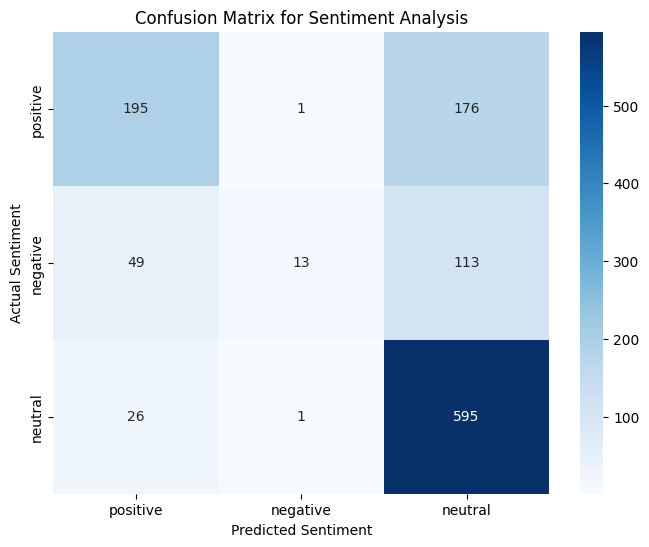

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions, labels=df['Sentiment'].unique())

class_names = df['Sentiment'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

#### SVM

In [29]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}" )

print("Classification Report\n", classification_report(y_test, predictions))

Accuracy: 0.70
Classification Report
               precision    recall  f1-score   support

    negative       0.32      0.09      0.14       175
     neutral       0.68      0.92      0.78       622
    positive       0.82      0.61      0.70       372

    accuracy                           0.70      1169
   macro avg       0.60      0.54      0.54      1169
weighted avg       0.67      0.70      0.66      1169



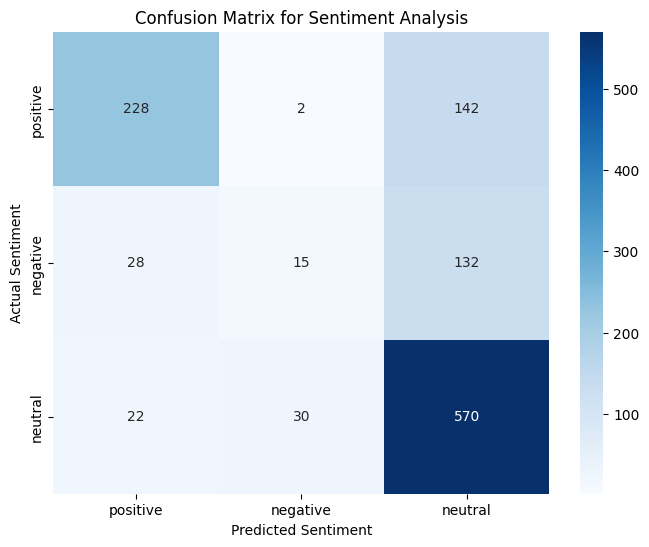

In [30]:
cm = confusion_matrix(y_test, predictions, labels=df['Sentiment'].unique())

class_names = df['Sentiment'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

#### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}" )

print("Classification Report\n", classification_report(y_test, predictions))

Accuracy: 0.67
Classification Report
               precision    recall  f1-score   support

    negative       0.24      0.15      0.19       175
     neutral       0.69      0.83      0.75       622
    positive       0.79      0.65      0.71       372

    accuracy                           0.67      1169
   macro avg       0.57      0.54      0.55      1169
weighted avg       0.65      0.67      0.65      1169



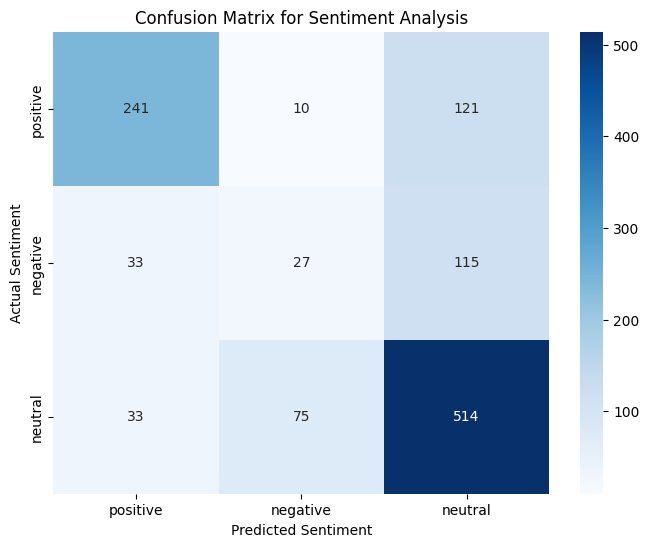

In [32]:
cm = confusion_matrix(y_test, predictions, labels=df['Sentiment'].unique())

class_names = df['Sentiment'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

### Predictions using Fine tuned model from Hugging Face through inference client

#### Model 1

In [33]:
from huggingface_hub import InferenceClient
import os
from dotenv import load_dotenv

load_dotenv()

client = InferenceClient(
    provider="hf-inference",
    api_key=os.environ["HF_TOKEN"],
)

headlines = df['Sentence'].tolist()

predictions = client.text_classification(
    headlines,
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
)

In [34]:
predicted_labels = [item['label'] for item in predictions]
true_labels = df['Sentiment']

print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.2f}" )
print("Classification Report\n", classification_report(true_labels, predicted_labels))

Accuracy: 0.76
Classification Report
               precision    recall  f1-score   support

    negative       0.55      0.74      0.63       860
     neutral       0.80      0.79      0.79      3130
    positive       0.86      0.73      0.79      1852

    accuracy                           0.76      5842
   macro avg       0.73      0.75      0.74      5842
weighted avg       0.78      0.76      0.77      5842



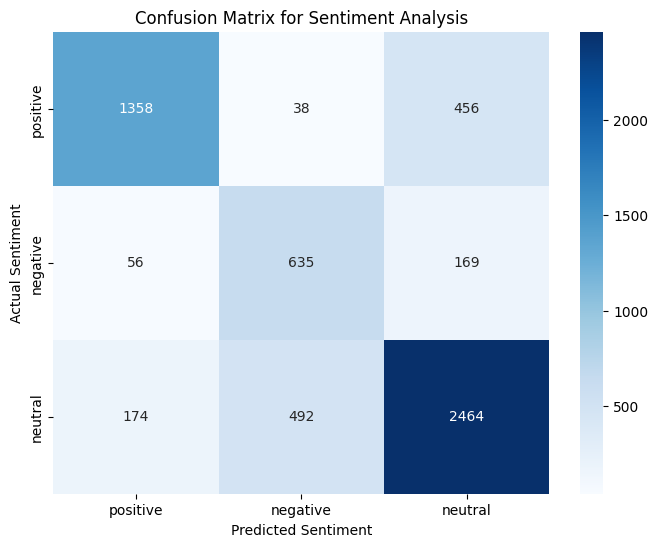

In [35]:
cm = confusion_matrix(true_labels, predicted_labels, labels=df['Sentiment'].unique())

class_names = df['Sentiment'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

### Prediction using directly loaded model from HuggingFace

#### Model 2

In [36]:
load_dotenv()

client = InferenceClient(
    provider="hf-inference",
    api_key=os.environ["HF_TOKEN"],
)

headlines = df['Sentence'].tolist()

predictions = client.text_classification(
    headlines,
    model="ProsusAI/finbert",
)

In [37]:
predicted_labels = [item['label'] for item in predictions]
true_labels = df['Sentiment']

print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.2f}" )
print("Classification Report\n", classification_report(true_labels, predicted_labels))

Accuracy: 0.76
Classification Report
               precision    recall  f1-score   support

    negative       0.51      0.82      0.63       860
     neutral       0.82      0.75      0.78      3130
    positive       0.87      0.75      0.80      1852

    accuracy                           0.76      5842
   macro avg       0.73      0.77      0.74      5842
weighted avg       0.79      0.76      0.77      5842



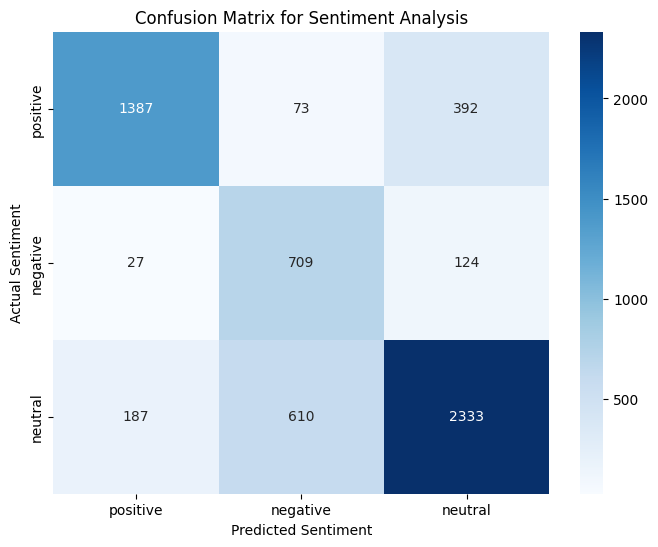

In [38]:
cm = confusion_matrix(true_labels, predicted_labels, labels=df['Sentiment'].unique())

class_names = df['Sentiment'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()